In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np

# Summary

In the notebook `stat_uncertainty_C.ipynb` we extracted the fit uncertainties for both the EDELWEISS measured ionization yield widths and the widths that result from _only_ the inclusion of multiple-scatter events in the nuclear recoil band. 

Since the EDELWEISS measured widths are still significantly larger than those for the multiple-scatter event inclusion, it implies that there is another factor that serves to widen the ionization yield distribution at a given measured recoil energy. We assume that factor is the effective nuclear recoil Fano factor. 

# Extracting the Effective Fano Factor

To extract the effective Fano factor for the nuclear recoils we need to come up with a parameter C$_F$ which is a function of recoil energy and is a corrected version of the measured "widening" parameter C from the EDELWEISS data and the widening parameter C$^{\prime}$ from the effect of multiple-scattering. 

The corrected parameter C$_F$ is assumed to be due to the effective Fano factor for nuclear recoils and is given by:

\begin{equation}
C_F = \sqrt{C^2 - C^{\prime 2}}.
\end{equation}

This parameter can be used to extract the effective Fano factor at a given recoil energy by applying our $\tilde{E}_r$-Q plane model (from `QEr_2D_joint.ipynb`), with an arbitrary Fano factor, until the correct ionization yield (Q) width is obtained (see `Qwidth_confirm.ipynb`). Mathematically this corresponds to adjusting F$_n$ until the following equality is satisfied:

\begin{equation}
\tilde{\sigma}_{Q}^0(E_r;F_n) = \sqrt{\left(\tilde{\sigma}_{Q}^0(E_r)\right)^2 + C_F^2}.
\end{equation}


In [2]:
import h5py

#get Edw fit results for sampling 6 parameters
filename = 'data/systematic_error_fits_corr_corrAB.h5'
#remove vars
f = h5py.File(filename,'r')
#for i in f['mcmc/edwdata_sys_error']:
#    print(i)

#save the results for the Edw fit
path='{}/{}/'.format('mcmc','edwdata_sys_error')

Cms = np.asarray(f[path+'Cms'])
slope = np.asarray(f[path+'m'])
a_yield = np.asarray(f[path+'A'])
b_yield = np.asarray(f[path+'B'])
aH = np.asarray(f[path+'aH'])
scale = np.asarray(f[path+'scale'])
samples = np.asarray(f[path+'samples'])
sampsize = np.asarray(f[path+'sampsize'])
xl = np.asarray(f[path+'Er'])
upvec = np.asarray(f[path+'Csig_u'])
dnvec = np.asarray(f[path+'Csig_l'])
Sigtot = np.asarray(f[path+'Sigss'])
Sigss = np.sqrt(Sigtot**2 - (Cms+slope*xl)**2)

#print(Cms)
#print(samples[0:5,:])
f.close()
#print(np.shape(samples))

470000
(100, 6)


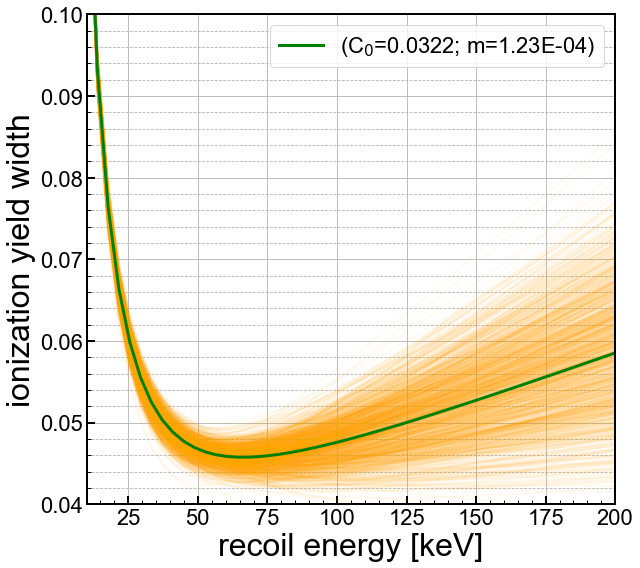

In [3]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

print(len(samples))
print(np.shape(samples[np.random.randint(len(samples), size=100)]))
#for Cms_em, m_em in samples[np.random.randint(len(samples), size=100)]:
for aH_em, Cms_em, m_em, scale_em, A_em, B_em in samples[np.random.randint(len(samples), size=1000)]:
    ax1.plot(xl, np.sqrt(Sigss**2+(Cms_em+m_em*xl)**2), color="orange", alpha=0.05)

#ax1.plot(xl,upvec,color='r',linestyle="--",linewidth=2, \
#         label='1$\sigma$ fluct.')
#ax1.plot(xl,dnvec,color='r',linestyle="--",linewidth=2, \
#         label='')

ax1.plot(xl,np.sqrt(Sigss**2+(Cms+xl*slope)**2),color='g',linestyle="-",linewidth=3, \
         label='(C$_0$={:01.3}; m={:01.2E})'.format(Cms,slope))

#ax1.errorbar(E_recoil[2::],sig_NR[2::], yerr=sig_NR_err[2::], \
#         color='k', marker='o', markersize=4,linestyle='none',label='NR Edw. Measurement', linewidth=2)

ymin = 0.04
ymax = 0.1



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('ionization yield width')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/EdwyieldWidthFit_Figure2b.eps')
plt.show()


In [4]:
filename = 'data/mcmc_fits.h5'
#remove vars
f = h5py.File(filename,'r')

#save the results for the Edw fit
path='{}/{}/'.format('mcmc','multiples')

Cms_m = np.asarray(f[path+'Cms'])
slope_m = np.asarray(f[path+'m'])
samples_m = np.asarray(f[path+'samples'])
sampsize_m = np.asarray(f[path+'sampsize'])
xl_m = np.asarray(f[path+'Er'])
upvec_m = np.asarray(f[path+'Csig_u'])
dnvec_m = np.asarray(f[path+'Csig_l'])
Sigss_m = np.asarray(f[path+'Sigss'])

f.close()
print(np.shape(samples_m))

(40000, 2)


40000


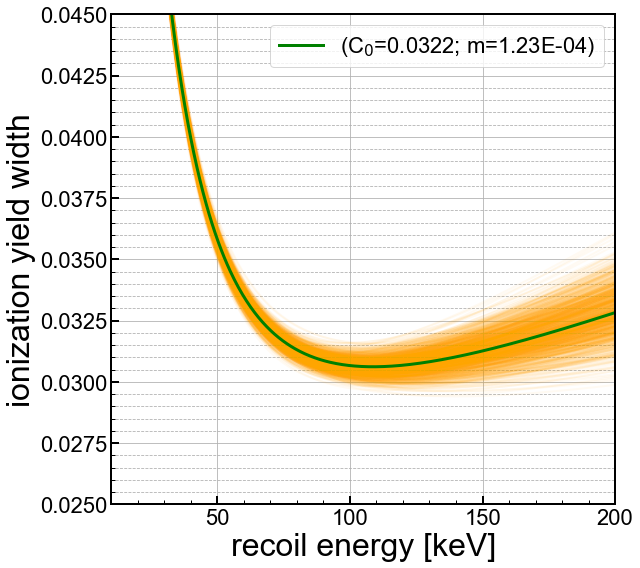

In [5]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

print(len(samples_m))
for Cms_em, m_em in samples_m[np.random.randint(len(samples_m), size=1000)]:
    ax1.plot(xl_m, np.sqrt(Sigss_m**2+(Cms_em+m_em*xl_m)**2), color="orange", alpha=0.05)

#ax1.plot(xl,upvec,color='r',linestyle="--",linewidth=2, \
#         label='1$\sigma$ fluct.')
#ax1.plot(xl,dnvec,color='r',linestyle="--",linewidth=2, \
#         label='')

ax1.plot(xl_m,np.sqrt(Sigss_m**2+(Cms_m+xl_m*slope_m)**2),color='g',linestyle="-",linewidth=3, \
         label='(C$_0$={:01.3}; m={:01.2E})'.format(Cms,slope))

#ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
#         color='k', marker='o', markersize=4,linestyle='none',label='simulated NR scatters', linewidth=2)

ymin = 0.025
ymax = 0.045



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('ionization yield width')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/MSyieldWidthFit_Figure3b.pdf')
plt.show()

470000
(100, 6)


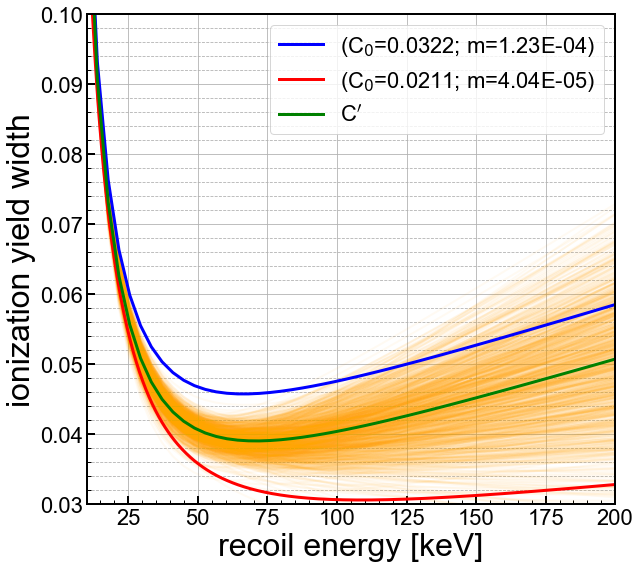

In [6]:
#compute and plot the new C'
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

print(len(samples))
print(np.shape(samples[np.random.randint(len(samples), size=100)]))
#for Cms_em, m_em in samples[np.random.randint(len(samples), size=100)]:
for aH_em, Cms_em, m_em, scale_em, A_em, B_em in samples[np.random.randint(len(samples), size=1000)]:
    msfit=samples_m[np.random.randint(len(samples_m), size=1)]
    #print(msfit)
    ax1.plot(xl, np.sqrt(Sigss**2-(msfit[0,0]+msfit[0,1]*xl)**2+(Cms_em+m_em*xl)**2), color="orange", alpha=0.05)

#ax1.plot(xl,upvec,color='r',linestyle="--",linewidth=2, \
#         label='1$\sigma$ fluct.')
#ax1.plot(xl,dnvec,color='r',linestyle="--",linewidth=2, \
#         label='')

ax1.plot(xl,np.sqrt(Sigss**2+(Cms+xl*slope)**2),color='b',linestyle="-",linewidth=3, \
         label='(C$_0$={:01.3}; m={:01.2E})'.format(Cms,slope))

ax1.plot(xl_m,np.sqrt(Sigss_m**2+(Cms_m+xl_m*slope_m)**2),color='r',linestyle="-",linewidth=3, \
         label='(C$_0$={:01.3}; m={:01.2E})'.format(Cms_m,slope_m))


ax1.plot(xl,np.sqrt(Sigss**2-(Cms_m+xl*slope_m)**2+(Cms+xl*slope)**2),color='g',linestyle="-",linewidth=3, \
         label='C$^\prime$')
#ax1.errorbar(E_recoil[2::],sig_NR[2::], yerr=sig_NR_err[2::], \
#         color='k', marker='o', markersize=4,linestyle='none',label='NR Edw. Measurement', linewidth=2)

ymin = 0.03
ymax = 0.1



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('ionization yield width')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/EdwyieldWidthFit_Figure2b.eps')
plt.show()

In [7]:
import fano_extract as fe
import imp
imp.reload(fe)

#Cms = np.asarray(f[path+'Cms'])
#slope = np.asarray(f[path+'m'])
#a_yield = np.asarray(f[path+'A'])
#b_yield = np.asarray(f[path+'B'])
#aH = np.asarray(f[path+'aH'])
#scale = np.asarray(f[path+'scale'])
#samples = np.asarray(f[path+'samples'])
#sampsize = np.asarray(f[path+'sampsize'])
#xl = np.asarray(f[path+'Er'])
#upvec = np.asarray(f[path+'Csig_u'])
#dnvec = np.asarray(f[path+'Csig_l'])
#Sigtot = np.asarray(f[path+'Sigss'])

#get the energy vector
Evec = np.linspace(7.0,200,10)

#get the central samples (best fits)
fit_best=np.asarray([aH,Cms,slope,scale,a_yield,b_yield])
#fit_best=np.asarray([aH,0.029,slope,scale,a_yield,b_yield])
msfit_best=np.asarray([Cms_m,slope_m])

print(Evec)
fe.get_sigvec(Evec,fit_best,msfit_best)
Fcentral = fe.get_root_from_sigvec(Evec,fit_best,msfit_best)
print(Fcentral)


#loop through samples
for aH_em, Cms_em, m_em, scale_em, A_em, B_em in samples[np.random.randint(len(samples), size=10)]:
    msfit=samples_m[np.random.randint(len(samples_m), size=1)]
    msfit = np.asarray(msfit[0])
    #print(msfit)
    
    fit = np.asarray([aH_em, Cms_em, m_em, scale_em, A_em, B_em])
    #print(fit)
    
    #print(fe.get_sigvec(Evec,fit,msfit))
    print(fe.get_root_from_sigvec(Evec,fit,msfit))

    

GGA3/NR/4.0/5.556E-02/0.0380/000/0.1493/0.1782/0.9975/
GGA3/NR/4.0/5.556E-02/0.0381/000/0.1537/0.1703/0.9948/
[  7.          28.44444444  49.88888889  71.33333333  92.77777778
 114.22222222 135.66666667 157.11111111 178.55555556 200.        ]
[  7.67404061  26.40407012  49.99663434  79.00656861 114.00622479
 155.53073719 204.10221038 260.22612986 324.39144433 397.07231469]
[  5.71146442  19.12997227  36.17401847  57.35947366  83.16010992
 114.0052132  150.30689576 192.46171668 240.85243023 295.84985643]
[  6.38929865  24.21756242  48.73950917  80.61794138 120.61138157
 169.47255151 227.95697914 296.81150649 376.76975639 468.55127628]
[  8.00284871  30.62795905  61.956353   102.91660346 154.56620952
 217.96019415 294.15767723 384.20625429 489.13604363 609.95857298]
[  3.35532798  17.69142018  43.3271668   81.79761486 134.75950145
 203.86964579 290.78470136 397.14439543 524.56275079 674.62499412]
[  9.87176287  31.31818256  55.43745624  82.67807264 113.47143852
 148.17301767 187.10387663

In [ ]:
#get one sigma errors

   
sampsize=1000
Fi = np.zeros((np.shape(Evec)[0],sampsize))
i=0
for aH_em, Cms_em, m_em, scale_em, A_em, B_em in samples[np.random.randint(len(samples), size=sampsize)]:
    msfit=samples_m[np.random.randint(len(samples_m), size=1)]
    msfit = np.asarray(msfit[0])   
    fit = np.asarray([aH_em, Cms_em, m_em, scale_em, A_em, B_em])
    Fano= fe.get_root_from_sigvec(Evec,fit,msfit)
    Fi[:,i] = Fano
    i=i+1
    #ax1.plot(Evec, Fi, color="blue", alpha=0.05)
    
upvec = np.mean(Fi,axis=1)+np.std(Fi,axis=1)
dnvec = np.mean(Fi,axis=1)-np.std(Fi,axis=1)

In [ ]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=10

blue = '#118DFA'

i=0
for aH_em, Cms_em, m_em, scale_em, A_em, B_em in samples[np.random.randint(len(samples), size=sampsize)]:
    #msfit=samples_m[np.random.randint(len(samples_m), size=1)]
    #msfit = np.asarray(msfit[0])   
    #fit = np.asarray([aH_em, Cms_em, m_em, scale_em, A_em, B_em])
    #Fi= fe.get_root_from_sigvec(Evec,fit,msfit)
    ax1.plot(Evec, Fi[:,i], color="blue", alpha=0.05)
    i=i+1

ax1.plot(Evec, upvec, color="r",linestyle="--", lw=2, alpha=0.8)
ax1.plot(Evec, dnvec, color="r",linestyle="--", lw=2, alpha=0.8)
    
#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
#ax1.plot (Esi(epr), 100*np.sqrt(f_Omega2_eta2(epr))*ylindv(1000*Esi(epr)), 'g-', label='$\Omega/\epsilon$ (NAC III approx. D)')
ax1.plot (Evec, Fcentral, 'k-', label='extracted Ge eff. Fano')
#ax1.plot (Er, Fup, 'b', label='')
#ax1.plot (Er, Fdn, 'b', label='')



ax1.fill_between(Evec,upvec,dnvec,facecolor='m',alpha=0.5,label='1$\sigma$ statistical region')
plt.axvline(x=24.0,color='k',linestyle="--")
plt.axvline(x=100,color='k',linestyle="--")
ax1.fill_between([24.0,100.0],[6,6],[300,300],facecolor='k',alpha=0.3,label='Edw. data')


ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(10, 200)
ax1.set_ylim(6,300)
ax1.set_xlabel('recoil energy ($E_r$) [keV]')
ax1.set_ylabel('effective Fano factor')
#ax1.grid(True)
#ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

In [ ]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=10

blue = '#118DFA'

i=0
for aH_em, Cms_em, m_em, scale_em, A_em, B_em in samples[np.random.randint(len(samples), size=1000)]:
    #msfit=samples_m[np.random.randint(len(samples_m), size=1)]
    #msfit = np.asarray(msfit[0])   
    #fit = np.asarray([aH_em, Cms_em, m_em, scale_em, A_em, B_em])
    #Fi= fe.get_root_from_sigvec(Evec,fit,msfit)
    ax1.plot(Evec, Fi[:,i], color="blue", alpha=0.05)
    i=i+1
    
ax1.plot(Evec, upvec, color="r",linestyle="--", lw=2, alpha=0.8)
ax1.plot(Evec, dnvec, color="r",linestyle="--", lw=2, alpha=0.8)

#ax1.errorbar(ddata_e,ddata_fluct_F,yerr=[ddata_fluct_F_err,ddata_fluct_F_err], marker='o', markersize=8, \
#             ecolor='k',color='k', linestyle='none', label='Dougherty eff. F', linewidth=2)


#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
#ax1.plot (Esi(epr), 100*np.sqrt(f_Omega2_eta2(epr))*ylindv(1000*Esi(epr)), 'g-', label='$\Omega/\epsilon$ (NAC III approx. D)')
ax1.plot (Evec, Fcentral, 'k-', label='extracted Ge eff. Fano')
#ax1.plot (Er, Fup, 'b', label='')
#ax1.plot (Er, Fdn, 'b', label='')


#ax1.fill_between(Er,Fdn,Fup,facecolor=blue,alpha=0.5,label='1$\sigma$ statistical region')
ax1.fill_between(Evec,upvec,dnvec,facecolor='m',alpha=0.5,label='1$\sigma$ statistical region')
plt.axvline(x=24.0,color='k',linestyle="--")
plt.axvline(x=100,color='k',linestyle="--")
#ax1.fill_between([24.0,100.0],[6,6],[300,300],facecolor='k',alpha=0.3,label='Edw. data')


ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(7, 20)
ax1.set_ylim(0,20)
ax1.set_xlabel('recoil energy ($E_r$) [keV]')
ax1.set_ylabel('effective Fano factor')
#ax1.grid(True)
#ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

In [ ]:
#set up a plot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
fig,axes = plt.subplots(1,1,figsize=(18.0,8.0),sharex=True)
ax1 = axes

xmax=10

blue = '#118DFA'

i=0
for aH_em, Cms_em, m_em, scale_em, A_em, B_em in samples[np.random.randint(len(samples), size=sampsize)]:
    #msfit=samples_m[np.random.randint(len(samples_m), size=1)]
    #msfit = np.asarray(msfit[0])   
    #fit = np.asarray([aH_em, Cms_em, m_em, scale_em, A_em, B_em])
    #Fi= fe.get_root_from_sigvec(Evec,fit,msfit)
    ax1.plot(Evec, Fi[:,i], color="blue", alpha=0.05)
    i=i+1

ax1.plot(Evec, upvec, color="r",linestyle="--", lw=2, alpha=0.8)
ax1.plot(Evec, dnvec, color="r",linestyle="--", lw=2, alpha=0.8)
    
#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
#ax1.plot (Esi(epr), 100*np.sqrt(f_Omega2_eta2(epr))*ylindv(1000*Esi(epr)), 'g-', label='$\Omega/\epsilon$ (NAC III approx. D)')
ax1.plot (Evec, Fcentral, 'k-', label='extracted Ge eff. Fano')
#ax1.plot (Er, Fup, 'b', label='')
#ax1.plot (Er, Fdn, 'b', label='')



ax1.fill_between(Evec,upvec,dnvec,facecolor='m',alpha=0.5,label='1$\sigma$ statistical region')
plt.axvline(x=24.0,color='k',linestyle="--")
plt.axvline(x=100,color='k',linestyle="--")
ax1.fill_between([24.0,100.0],[6,6],[300,300],facecolor='k',alpha=0.3,label='Edw. data')


ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(10, 200)
ax1.set_ylim(6,300)
ax1.set_xlabel('recoil energy ($E_r$) [keV]')
ax1.set_ylabel('effective Fano factor')
#ax1.grid(True)
#ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})

###Make inset
bbox_ll_x = 0.04
bbox_ll_y = -0.0225
bbox_w = 1
bbox_h = 1
eps = 0.01
axins = inset_axes(ax1, height="25%", width="50%", bbox_to_anchor=(bbox_ll_x,bbox_ll_y,bbox_w-bbox_ll_x,bbox_h), loc='upper left',bbox_transform=ax1.transAxes)
#ax1.add_patch(plt.Rectangle((bbox_ll_x, bbox_ll_y+eps), bbox_w-eps-bbox_ll_x, bbox_h-eps, ls="--", ec="c", fc="None",
#                           transform=ax1.transAxes))

#axins = plt.axes([0,0,1,1])
#axins_pos = InsetPosition(ax3, [0.25, 0.65, 0.7, 0.3])
#axins.set_axes_locator(axins_pos)

# larger region than the original image
x1, x2, y1, y2 = 7, 30, 0, 30
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
i=0
for aH_em, Cms_em, m_em, scale_em, A_em, B_em in samples[np.random.randint(len(samples), size=1000)]:
    #msfit=samples_m[np.random.randint(len(samples_m), size=1)]
    #msfit = np.asarray(msfit[0])   
    #fit = np.asarray([aH_em, Cms_em, m_em, scale_em, A_em, B_em])
    #Fi= fe.get_root_from_sigvec(Evec,fit,msfit)
    axins.plot(Evec, Fi[:,i], color="blue", alpha=0.05)
    i=i+1
axins.plot(Evec, upvec, color="r",linestyle="--", lw=2, alpha=0.8)
axins.plot(Evec, dnvec, color="r",linestyle="--", lw=2, alpha=0.8)
axins.plot (Evec, Fcentral, 'k-', label='extracted Ge eff. Fano')
axins.fill_between(Evec,upvec,dnvec,facecolor='m',alpha=0.5,label='1$\sigma$ statistical region')
plt.axvline(x=24.0,color='k',linestyle="--")
plt.axvline(x=100,color='k',linestyle="--")
axins.fill_between([24.0,100.0],[0,0],[50,50],facecolor='k',alpha=0.3,label='Edw. data')
axins.yaxis.grid(True,which='minor',linestyle='--')
axins.xaxis.grid(True,which='minor',linestyle='--')
axins.grid(True)
####


for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)
  axins.spines[axis].set_linewidth(2)

#plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()